# Pandas Introduction

Framework of this course and some examples are taken from the [Quantopian](https://www.quantopian.com/lectures). Quantopian lectures are not for Python version we use in the course. So there are some syntax differences. 

So far we learnt basic concepts about the libraries with [Numpy Introduction](https://itueconomics.github.io/bil113e/python2-numpy.html) course. We will introduce another major library used for stastics, big data and similar works. We will use pandas with numpy together:

In [1]:
import numpy as np
import pandas as pd

Please add a command to show `matplotlib` libraries. We will introduce `matplotlib` library in the **Data Visualization** course later.

In [2]:
%matplotlib inline

Let's create a [random.normal](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.normal.html) function to define a random dataset contains 100 values, with mean $0$ and standard deviation $ 0.5$.

In [3]:
dist = np.random.normal(0, 0.5, (100,))

In [4]:
print(dist.shape)

(100,)


## Series

Using `pandas` library we can convert `dist` array into a `Series`:

In [5]:
s = pd.Series(dist)

In [6]:
s.head() # First 5 element

0    0.206460
1   -0.276749
2   -0.228649
3   -1.062890
4    0.428246
dtype: float64

In [7]:
s.head(10) # First 10 element

0    0.206460
1   -0.276749
2   -0.228649
3   -1.062890
4    0.428246
5   -0.592387
6   -0.059625
7    0.278515
8   -0.446481
9    0.311996
dtype: float64

In [8]:
s.tail() # Last 5 element

95    0.081638
96    0.170132
97    0.623729
98   -0.735012
99   -0.558608
dtype: float64

In [9]:
s.tail(10) # Last 10 element

90    0.124739
91   -0.110149
92   -0.040255
93   -0.566723
94   -0.278076
95    0.081638
96    0.170132
97    0.623729
98   -0.735012
99   -0.558608
dtype: float64

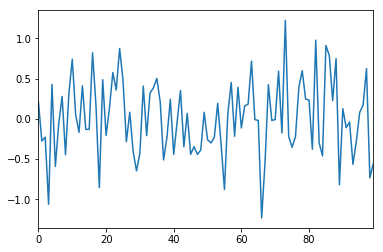

In [10]:
s.plot()

This is our Series data. Unlike the arrays Series have other options. `Series` are more useful for data analysis compared to the arrays. Though they have different uses. 

In [11]:
print(s.name)

None


We do not have a name for series. Let's define it:

In [12]:
s.name = "Stock returns"
print(s.name)

Stock returns


In [13]:
print(s.index)

RangeIndex(start=0, stop=100, step=1)


Assume that this is a return data of a stock. So the Index range should be data, daily:

[pandas.date_range](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.date_range.html)

In [14]:
new_index = pd.date_range("2016-01-01", periods=len(s), freq="B")

- set a starting date: `2016-01-01`
- defined the periods with: `len(s)`
- frequency created for the business days to skip weekends: `B`

In [15]:
s.index = new_index

We change the series index with `new_index` created above. Let's plot it:

[pandas.series.plot](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html)

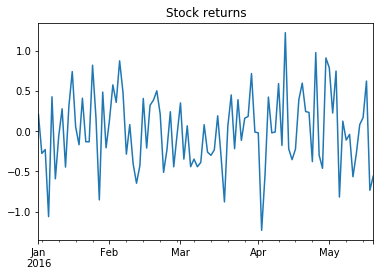

In [16]:
s.plot(title=s.name)

Well... We have a more proper plot compared to the first one. Please be careful about the options. 

Assume these values are percentage, like `1%`. What happened at the end of the day? We need to define them as $s \times 0.01 + $ to see their true values. After this process we will find cumulative product:

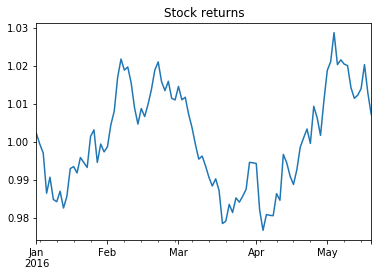

In [17]:
s_cum = (s*0.01 + 1).cumprod()
s_cum.plot(title=s_cum.name)

It looks like within 100 days our stock price increased/decreased(percent): 

In [18]:
print((s_cum[-1] - 1)*100)

0.710663278594


### Accessing elements

`iloc[start:end:step]`

By default `step=1`.

In [19]:
print("First element of the series: ", s.iloc[0])
print("Last element of the series: ", s.iloc[len(s)-1])
print("(or) Last element of the series: ", s.iloc[-1])

First element of the series:  0.2064604866
Last element of the series:  -0.558607761734
(or) Last element of the series:  -0.558607761734


You can make slicing:

In [20]:
print(s.iloc[:10])

2016-01-01    0.206460
2016-01-04   -0.276749
2016-01-05   -0.228649
2016-01-06   -1.062890
2016-01-07    0.428246
2016-01-08   -0.592387
2016-01-11   -0.059625
2016-01-12    0.278515
2016-01-13   -0.446481
2016-01-14    0.311996
Freq: B, Name: Stock returns, dtype: float64


In [21]:
print(s.iloc[:100:10])

2016-01-01    0.206460
2016-01-15    0.741621
2016-01-29   -0.205949
2016-02-12   -0.427155
2016-02-26   -0.442942
2016-03-11   -0.259963
2016-03-25   -0.114082
2016-04-08   -0.009781
2016-04-22    0.233274
2016-05-06    0.124739
Freq: 10B, Name: Stock returns, dtype: float64


You can access series elements with `index_name`:

In [22]:
print(s.loc['2016-01-01'])

0.2064604866


In [23]:
print(s.loc['2016-01-01':'2016-01-10']) # Between dates

2016-01-01    0.206460
2016-01-04   -0.276749
2016-01-05   -0.228649
2016-01-06   -1.062890
2016-01-07    0.428246
2016-01-08   -0.592387
Freq: B, Name: Stock returns, dtype: float64


### Boolean

Which dates have negative returns?

In [24]:
print((s < 0).head())

2016-01-01    False
2016-01-04     True
2016-01-05     True
2016-01-06     True
2016-01-07    False
Freq: B, Name: Stock returns, dtype: bool


How to access those series?

In [25]:
print(s[s < 0].head())

2016-01-04   -0.276749
2016-01-05   -0.228649
2016-01-06   -1.062890
2016-01-08   -0.592387
2016-01-11   -0.059625
Name: Stock returns, dtype: float64


In [26]:
print(s[s > 1])

2016-04-13    1.226129
Freq: B, Name: Stock returns, dtype: float64


It looks like we have only series above that are greater than 1.

In [27]:
print(s[(s > 1) | (s < -1)])

2016-01-06   -1.062890
2016-04-04   -1.233236
2016-04-13    1.226129
Name: Stock returns, dtype: float64


Or simply:

In [28]:
print(s[np.abs(s) > 1])

2016-01-06   -1.062890
2016-04-04   -1.233236
2016-04-13    1.226129
Name: Stock returns, dtype: float64


### Some basic functions:

In [29]:
print(s.mean()) # mean
print(s.std()) # standard deviation
print(s.max()) # max value
print(s.min()) # min value
print(s.median()) # median value

0.008180270164569342
0.47112885016508926
1.22612898439
-1.23323629512
-0.015338590910960789


You can do all by just `describe` function:

In [30]:
s.describe()

count    100.000000
mean       0.008180
std        0.471129
min       -1.233236
25%       -0.302915
50%       -0.015339
75%        0.353289
max        1.226129
Name: Stock returns, dtype: float64

In [31]:
print(s.abs().head()) # Returns absolute values

2016-01-01    0.206460
2016-01-04    0.276749
2016-01-05    0.228649
2016-01-06    1.062890
2016-01-07    0.428246
Freq: B, Name: Stock returns, dtype: float64


### NaN values

In [32]:
new_series = pd.Series([1,5,np.nan,2,6,8,2,np.nan])

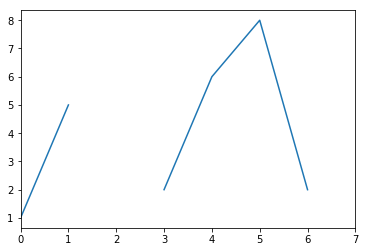

In [33]:
new_series.plot()

We can drop null values:

In [34]:
new_series = new_series.dropna()

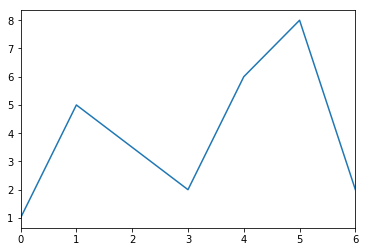

In [35]:
new_series.plot()

## DataFrame

[pandas.DataFrame](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html)

- Dataframe
- rolling mean
- file operations

We can carry many operations of the `Series` within the `pandas.DataFrame`

In [36]:
dict_data = {
    'a' : [1, 2, 3, 4, 5],
    'b' : ['L', 'K', 'J', 'M', 'Z'],
    'c' : np.random.normal(0, 1, 5)
}
print (dict_data)

{'a': [1, 2, 3, 4, 5], 'b': ['L', 'K', 'J', 'M', 'Z'], 'c': array([-0.68514057,  0.74877699, -0.85640892, -0.24735215,  0.42636971])}


In [37]:
df = pd.DataFrame(dict_data, index=pd.date_range('2016-01-01', periods=5))
print (df)

            a  b         c
2016-01-01  1  L -0.685141
2016-01-02  2  K  0.748777
2016-01-03  3  J -0.856409
2016-01-04  4  M -0.247352
2016-01-05  5  Z  0.426370


What happened here is that we define three series named `a, b, and c`. They can converted to the `pandas.Series` seperately instead we create a `DataFrame` to combine all attributes. Each column in the `DataFrame` are a `pandas.Series`.

In [38]:
print(type(df['a']))
print(type(df['b']))
print(type(df['c']))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


But together:

In [39]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


You can define a `DataFrame` in many ways:

You do not necessarly type the name of the column. You can just write down the column indexes. First column is:

In [40]:
df.iloc[:,0].head()

2016-01-01    1
2016-01-02    2
2016-01-03    3
2016-01-04    4
2016-01-05    5
Freq: D, Name: a, dtype: int64

In [41]:
s_1 = pd.Series([2, 4, 6, 8, 10], name='Evens')
s_2 = pd.Series([1, 3, 5, 7, 9], name="Odds")
numbers = pd.concat([s_1, s_2], axis=1)
print(numbers)

   Evens  Odds
0      2     1
1      4     3
2      6     5
3      8     7
4     10     9


Column names:

In [42]:
print(numbers.columns)

Index(['Evens', 'Odds'], dtype='object')


Change column names:

In [43]:
numbers.columns = ['Shmevens', 'Shmodds']

In [44]:
print(numbers)

   Shmevens  Shmodds
0         2        1
1         4        3
2         6        5
3         8        7
4        10        9


Most of the attributes of the `pandas.Series` are valid for `DataFrames`:

In [45]:
print(numbers.index)

RangeIndex(start=0, stop=5, step=1)


In [46]:
numbers.index = pd.date_range("2016-01-01", periods=len(numbers))
print(numbers)

            Shmevens  Shmodds
2016-01-01         2        1
2016-01-02         4        3
2016-01-03         6        5
2016-01-04         8        7
2016-01-05        10        9


In [47]:
print(numbers.values)

[[ 2  1]
 [ 4  3]
 [ 6  5]
 [ 8  7]
 [10  9]]


Let's create a similar DataFrame as done with series, randomly:

In [48]:
dist = np.random.normal(0, 0.5, (100,10))

In [49]:
df = pd.DataFrame(dist)
df.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.446992,-0.125940,-0.000399,-0.501827,0.115230,0.479060,-0.116413,-0.409685,0.590708,-0.350776
1,-0.330578,0.802011,1.222257,-0.051850,0.775409,0.386112,-0.018506,0.505156,-0.428722,0.651669
2,0.598588,1.074359,1.346447,0.452431,-0.092580,-0.575396,-0.199225,-0.544727,0.151302,-0.172620
3,1.124833,-0.491186,-0.568421,-0.454849,0.271061,-0.675577,-0.446528,0.302356,0.223904,-0.554224
4,0.125049,0.324779,0.352703,0.053338,0.607782,-0.678665,-0.452536,0.291534,-0.640169,0.182811


In [50]:
df.index = pd.date_range("2016-01-01", periods=len(df.index), freq='B')

In [51]:
df.columns = ['Stck {}'.format(str(i)) for i in range(1,11)]

In [52]:
df.head()

,Stck 1,Stck 2,Stck 3,Stck 4,Stck 5,Stck 6,Stck 7,Stck 8,Stck 9,Stck 10
2016-01-01,-0.446992,-0.125940,-0.000399,-0.501827,0.115230,0.479060,-0.116413,-0.409685,0.590708,-0.350776
2016-01-04,-0.330578,0.802011,1.222257,-0.051850,0.775409,0.386112,-0.018506,0.505156,-0.428722,0.651669
2016-01-05,0.598588,1.074359,1.346447,0.452431,-0.092580,-0.575396,-0.199225,-0.544727,0.151302,-0.172620
2016-01-06,1.124833,-0.491186,-0.568421,-0.454849,0.271061,-0.675577,-0.446528,0.302356,0.223904,-0.554224
2016-01-07,0.125049,0.324779,0.352703,0.053338,0.607782,-0.678665,-0.452536,0.291534,-0.640169,0.182811


Now we have 10 stock prices returns within one DataFrame. Let's calculate the returns as multiplication of previous day: 

In [53]:
df_cum = df*0.01 + 1
df_cum = df_cum.cumprod()

In [54]:
df_cum.head()

,Stck 1,Stck 2,Stck 3,Stck 4,Stck 5,Stck 6,Stck 7,Stck 8,Stck 9,Stck 10
2016-01-01,0.995530,0.998741,0.999996,0.994982,1.001152,1.004791,0.998836,0.995903,1.005907,0.996492
2016-01-04,0.992239,1.006751,1.012219,0.994466,1.008915,1.008670,0.998651,1.000934,1.001595,1.002986
2016-01-05,0.998179,1.017567,1.025848,0.998965,1.007981,1.002866,0.996661,0.995482,1.003110,1.001255
2016-01-06,1.009406,1.012569,1.020016,0.994421,1.010714,0.996091,0.992211,0.998492,1.005356,0.995706
2016-01-07,1.010669,1.015857,1.023614,0.994952,1.016856,0.989331,0.987721,1.001402,0.998920,0.997526


[pandas.DataFrame.plot](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html)

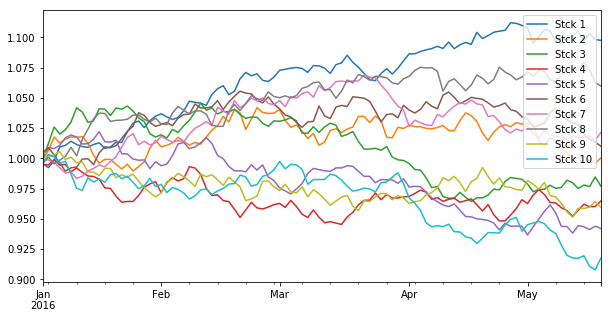

In [55]:
df_cum.plot(figsize = (10,5))

As you see at the end of the day some stocks made profit and some made loss. 

Locating the values works same with `Series`. The last day profits are loses:

In [56]:
df_cum.iloc[-1]

Stck 1     1.097438
Stck 2     1.000256
Stck 3     0.977037
Stck 4     0.964654
Stck 5     0.941996
Stck 6     1.009997
Stck 7     1.021212
Stck 8     1.059765
Stck 9     0.959447
Stck 10    0.917423
Name: 2016-05-19 00:00:00, dtype: float64

**BUT ** This is a two dimensional shape and you need two parameters to locate specific values. 

In [57]:
df_cum.iloc[-1,2]

0.97703710774899499

For example we can only care about profited stocks:

In [58]:
df_cum.iloc[-1]>1

Stck 1      True
Stck 2      True
Stck 3     False
Stck 4     False
Stck 5     False
Stck 6      True
Stck 7      True
Stck 8      True
Stck 9     False
Stck 10    False
Name: 2016-05-19 00:00:00, dtype: bool

### Adding new columns

You can simply define a column name:

In [59]:
df['new'] = 1

In [60]:
df.head()

,Stck 1,Stck 2,Stck 3,Stck 4,Stck 5,Stck 6,Stck 7,Stck 8,Stck 9,Stck 10,new
2016-01-01,-0.446992,-0.125940,-0.000399,-0.501827,0.115230,0.479060,-0.116413,-0.409685,0.590708,-0.350776,1
2016-01-04,-0.330578,0.802011,1.222257,-0.051850,0.775409,0.386112,-0.018506,0.505156,-0.428722,0.651669,1
2016-01-05,0.598588,1.074359,1.346447,0.452431,-0.092580,-0.575396,-0.199225,-0.544727,0.151302,-0.172620,1
2016-01-06,1.124833,-0.491186,-0.568421,-0.454849,0.271061,-0.675577,-0.446528,0.302356,0.223904,-0.554224,1
2016-01-07,0.125049,0.324779,0.352703,0.053338,0.607782,-0.678665,-0.452536,0.291534,-0.640169,0.182811,1


Deleting a column is very easy:

In [61]:
del df['new']

Sorting by columns:

In [62]:
df.sort_values(by='Stck 2').head()

,Stck 1,Stck 2,Stck 3,Stck 4,Stck 5,Stck 6,Stck 7,Stck 8,Stck 9,Stck 10
2016-03-28,0.374295,-1.354561,0.300346,0.441737,-0.015118,0.591829,-0.481357,-0.084721,-0.055706,0.074755
2016-05-04,0.494602,-1.323258,0.193482,0.476564,0.662402,0.146976,-0.357030,0.437952,-0.431906,0.143335
2016-02-22,0.486382,-1.319228,-0.313781,0.654399,-0.075103,-0.151623,0.312741,0.564649,-1.162388,-0.156544
2016-01-14,0.234236,-0.978936,0.121669,-0.040426,0.362779,-0.475869,0.215675,0.837823,-0.031925,-0.377035
2016-03-10,-0.013318,-0.959109,-0.454863,-0.627668,-0.104735,1.226608,0.903144,0.040904,-0.336801,0.011334


## Read and Save DataFrame to files

We will learn how to read files and save dataframe to the files. pandas can read all common databases. Command `pd.read_`:

In [63]:
movies = pd.read_csv('movies.csv')

Be careful! Your notebook file and the `movies.csv` file must be in the same folder. Or you must show the location of the file clearly. 

In [64]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [65]:
movies.tail()

,movieId,title,genres
9120,162672,Mohenjo Daro (2016),Adventure|Drama|Romance
9121,163056,Shin Godzilla (2016),Action|Adventure|Fantasy|Sci-Fi
9122,163949,The Beatles: Eight Days a Week - The Touring Y...,Documentary
9123,164977,The Gay Desperado (1936),Comedy
9124,164979,"Women of '69, Unboxed",Documentary


You can find this database from [movieLens](https://grouplens.org/datasets/movielens/). 

download [movies.csv](../assets/movies.csv)

We will do some operations with this dataset. For example title contains year of the movies. It would look nicer if we can seperate it and create a new column. We will use the `Series.str` operations. Find the [documentation](https://pandas.pydata.org/pandas-docs/stable/api.html#string-handling). 

You can do this operation with many different way. First way is to use `str.extract` method to find years and define a new column:

In [66]:
movies['year'] = movies['title'].str.extract('(\d{4})')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


In [67]:
movies.tail()

,movieId,title,genres,year
9120,162672,Mohenjo Daro (2016),Adventure|Drama|Romance,2016
9121,163056,Shin Godzilla (2016),Action|Adventure|Fantasy|Sci-Fi,2016
9122,163949,The Beatles: Eight Days a Week - The Touring Y...,Documentary,2016
9123,164977,The Gay Desperado (1936),Comedy,1936
9124,164979,"Women of '69, Unboxed",Documentary,NaN


We use a ReGeX expressoion: `(\d{4})`. Paranthesis represents the group. So we can create two different columns by extracting using two or more paranthesis. `\d` represents the digit. `\d{4}` expression together implies 4 consequtive numbers. You should check the regular expression [documentation](https://docs.python.org/3/library/re.html) for further use. 

Let's see how many `NaN` years we have:

In [68]:
movies[movies['year'].isnull()]

,movieId,title,genres,year
9017,143410,Hyena Road,(no genres listed),NaN
9063,151307,The Lovers and the Despot,(no genres listed),NaN
9118,162376,Stranger Things,Drama,NaN
9124,164979,"Women of '69, Unboxed",Documentary,NaN


Only four of them do not have the year. So if you are making data analysis you can manually fill this values by searching the internet. For now, I will drop them using `dropna()` function:

In [69]:
movies = movies.dropna()

Be careful with the expression above. I defined movies after droping the null values: ```movies = movies.dropna()```. Let's check dataframe again:

In [70]:
movies.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


We can remove the years from the title using [str.replace](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.replace.html) function. 

In [71]:
movies['title'] = movies['title'].str.replace('\(\d{4}\)','')
movies.head()

,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995


We will create new columns for genres wıth boolean values. It will do will take time. Follow carefully:

In [72]:
gen = movies['genres'].str.split('|')

In [73]:
gen_list = []
for i in gen:
    for j in i:
        gen_list.append(j)

Find the unique genres:

In [74]:
gen_list = set(gen_list) # set() function automatically removes the duplicates.
gen_list = list(gen_list)
print(len(gen_list))

20


In [75]:
gen_list=sorted(gen_list)
gen_list

['(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

We should drop the first value using `pop()` function:

In [76]:
gen_list.pop(0)

'(no genres listed)'

It looks like we have 20 different genres. Let's define a new column for each of them:

In [77]:
for i in gen_list:
    movies[i] = movies['genres'].str.contains(str(i))

In [78]:
movies.head()

,movieId,title,genres,year,Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,False,True,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
1,2,Jumanji,Adventure|Children|Fantasy,1995,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,Grumpier Old Men,Comedy|Romance,1995,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
4,5,Father of the Bride Part II,Comedy,1995,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


Now we can drop the `genres` column:

In [79]:
del movies['genres']

In [80]:
movies.head()

,movieId,title,year,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,1995,False,True,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,Jumanji,1995,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,Grumpier Old Men,1995,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
3,4,Waiting to Exhale,1995,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
4,5,Father of the Bride Part II,1995,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [81]:
movies[gen_list].sum().sort_values()

Film-Noir       133
IMAX            153
Western         168
War             367
Musical         394
Animation       447
Documentary     494
Mystery         543
Children        583
Fantasy         654
Sci-Fi          792
Horror          877
Crime          1100
Adventure      1117
Romance        1545
Action         1545
Thriller       1729
Comedy         3315
Drama          4364
dtype: int64

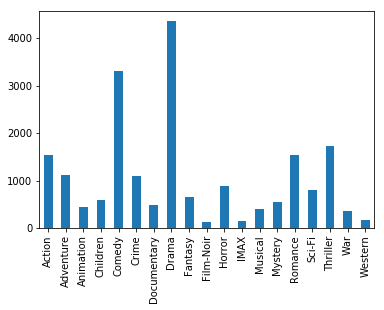

In [82]:
movies[gen_list].sum().plot(kind = 'bar')

In [83]:
movies['year'] = pd.to_numeric(movies['year'])

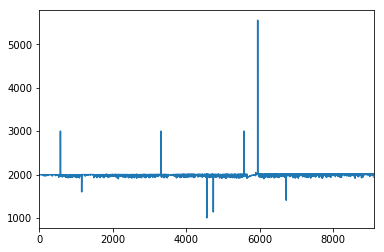

In [84]:
movies['year'].plot()

Opps... It looks like we have some non-sense years inside our data. Let's trim the years later than 2018 and earlier than 1800:

In [85]:
movies = movies[((movies['year'] < 2018) & (movies['year'] > 1800))]

Well, we redefined the `movies` excluding some years:

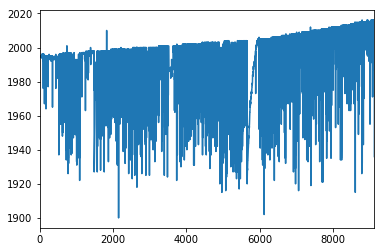

In [86]:
movies['year'].plot()

## Saving Database

Pandas allows you to save your DataFrame in different types of files: csv, xlsx, html, latex, stata, sql, xarray, json, and so on.

### Saving CSV

In [87]:
movies.to_csv('movies_new.csv')

After you do this operation, a filed names `movies_new.csv` will be created. You can read the same file by the command we used earlier.

### Saving Excel

In order to save an Excel file you need to create and ExcelWrite object first:

In [88]:
ex = pd.ExcelWriter('movies.xlsx')

In [89]:
movies.to_excel(ex, 'Sheet 1')

In [90]:
ex.save()

You have an excel file named `movies.xlsx` and dataframe saved to the `Sheet 1`.

### Saving SQL

In [91]:
import sqlite3

In [92]:
conn = sqlite3.connect('movies.db')

In [93]:
movies.to_sql('Movies', conn)

In [94]:
conn.close()

Now we saved our dataframe to a sql file. 

## References

1. https://pandas.pydata.org/pandas-docs/stable/tutorials.html
2. https://www.quantopian.com/lectures
3. https://grouplens.org/datasets/movielens/